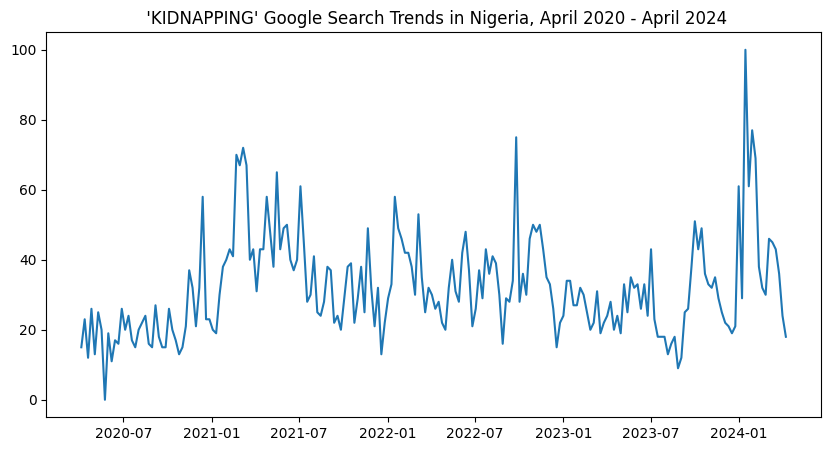

In [17]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

#setup Google trend query
pytrends = TrendReq(hl='en-UK', tz=0)
kw_list =["Kidnapping"]
pytrends.build_payload(kw_list, geo='NG', timeframe='2020-04-07 2024-04-08') 

#get data over time
data = pytrends.interest_over_time() 

#plot data
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(data.index, data["Kidnapping"])
plt.title(" 'KIDNAPPING' Google Search Trends in Nigeria, April 2020 - April 2024")
plt.show()

In [14]:
data.head()

,Kidnapping,isPartial
date,,
2020-04-05,15,False
2020-04-12,23,False
2020-04-19,12,False
2020-04-26,26,False
2020-05-03,13,False
